In [1]:
import gymnasium as gym
import torch
from ACAgent import ACAgent
from collections import defaultdict

from tqdm import tqdm
import numpy as np
from lib.utils.draw import draw_line

In [2]:
# parameter
actor_lr = 1e-3
critic_lr = 1e-2
hidden_dim = 128
gamma = 0.98
SEED = 0
env = gym.make('CartPole-v1')
torch.manual_seed(SEED)
np.random.seed(SEED)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = ACAgent(state_dim,hidden_dim, action_dim, actor_lr,critic_lr, gamma, SEED)
stats = defaultdict(lambda: [])

In [3]:
env = gym.make('CartPole-v1')
num_episodes = 1000
num_part = 10
seed_list = np.random.randint(num_episodes*10,size=num_episodes)
print(seed_list[0:10], seed_list[-10:])
env_seed_list = [int(i) for i in seed_list]
for i in range(num_part):
    with tqdm( total= int(num_episodes/num_part), desc = 'Iteration %d' % i) as pbar:
        for i_episode in range( int(num_episodes/num_part) ):

            state = np.array(env.reset(seed=env_seed_list[i_episode])[0])
            done = False
            stats_rewards = 0
            stats_steps = 0
            eps = 0
            
            transition_dict = defaultdict(lambda: [])
            while not done:
                action = agent.get_action(state)
                # env.step() 的返回为一个 ()
                # (array([-0.18629785, -1.7418021 ,  0.23948981,  2.7527318 ], dtype=float32), 1.0, True, False, {})
                result = env.step(action)
                next_state, reward, done  =  result[0], result[1], result[2]

                agent.update(state, action, next_state,reward, done)
                # stats update
                stats_rewards += reward
                stats_steps += 1
                

                if stats_steps > 200:
                    break
                state = next_state
            # update policy net
            
            stats['rewards'].append(stats_rewards)
            stats['steps'].append(stats_steps)
            # tqdm
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({
                    'episode': '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return': '%.3f' % np.mean(stats['rewards'][-10:]),
                })
            pbar.update(1)



[2732 9845 3264 4859 9225 7891 4373 5874 6744 3468] [6835 6388  243 2581 3215 2800 6410 1681 3047  797]


Iteration 2:  95%|█████████▌| 95/100 [00:40<00:02,  2.35it/s, episode=290, return=163.100]


KeyboardInterrupt: 

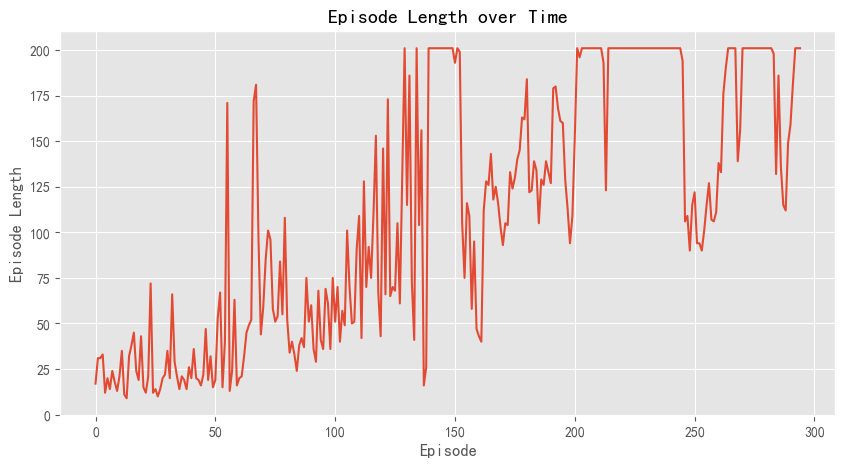

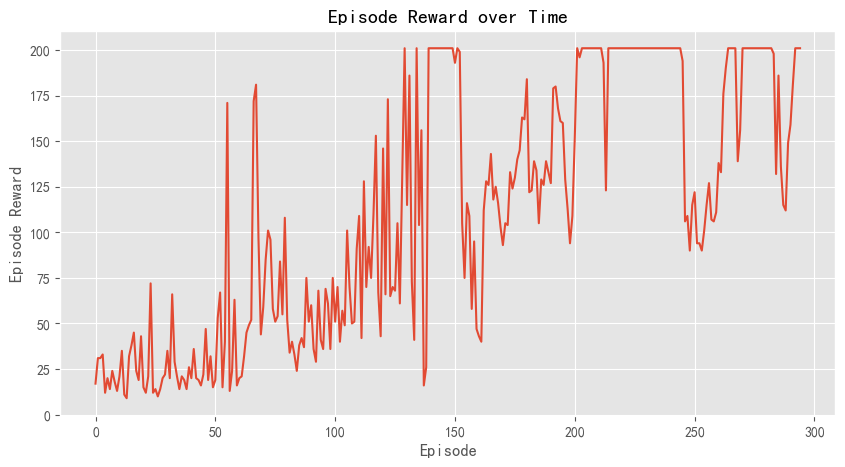

In [4]:
draw_line(stats)

In [5]:
env = gym.make('CartPole-v1',render_mode='human')


test_episode = 10
STATS = defaultdict(lambda: [])
for i in range(test_episode):
    stats_rewards = 0
    stats_steps = 0
    state = env.reset()[0]
    done = False
    while not done:
        action = agent.predict_action(state)
        result = env.step(action)
        next_state, reward, done  =  result[0], result[1], result[2]

        state = next_state
        #stats update
        stats_rewards += reward
        stats_steps += 1

    STATS['rewards'].append(stats_rewards)
    STATS['steps'].append(stats_steps)
    
draw_line(STATS)

KeyboardInterrupt: 